<a href="https://colab.research.google.com/github/Aadit-17/Exploratory-Data-Analysis-Assignment/blob/main/EDA_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis
### Digital Assignment 1
### Aadit Shah 21BDS0203

https://github.com/Aadit-17/Exploratory-Data-Analysis-Assignment/blob/main/EDA_Assignment1.ipynb

#### Importing Libraries

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

#### Load the Dataset

In [38]:
auto_df = pd.read_csv('Auto.csv')
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### Dimension of the Dataset

In [39]:
auto_df.shape

(392, 9)

#### Summary Statistics

In [40]:
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


#### Data Handling and Cleaning

In [41]:
# Check for missing values
auto_df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
year,0
origin,0
name,0


In [42]:
# Check for duplicate rows
auto_df.duplicated().sum()

0

No need for further cleaning

#### Univariate Analysis

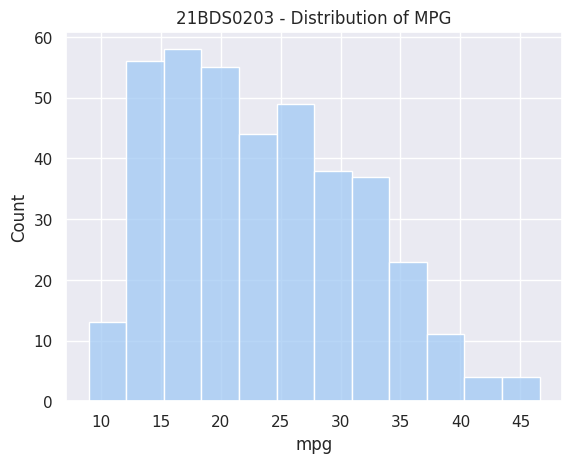

In [43]:
#Distribution of mpg
sns.set(palette='pastel')
sns.histplot(auto_df['mpg'])
plt.title('21BDS0203 - Distribution of MPG')
plt.show()

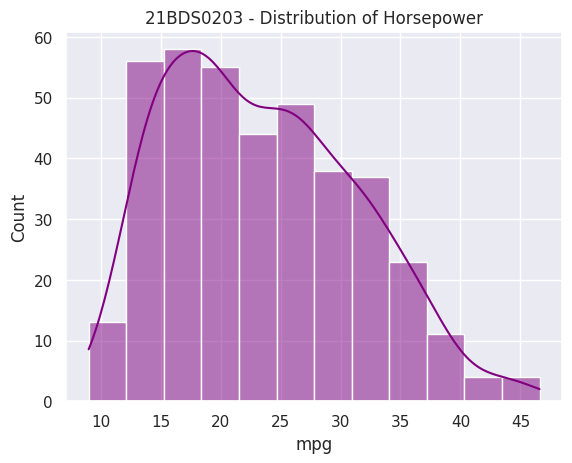

In [44]:
#Distribution of horsepower with density line
sns.histplot(auto_df['mpg'], kde=True, color = 'purple')
plt.title('21BDS0203 - Distribution of Horsepower')
plt.show()

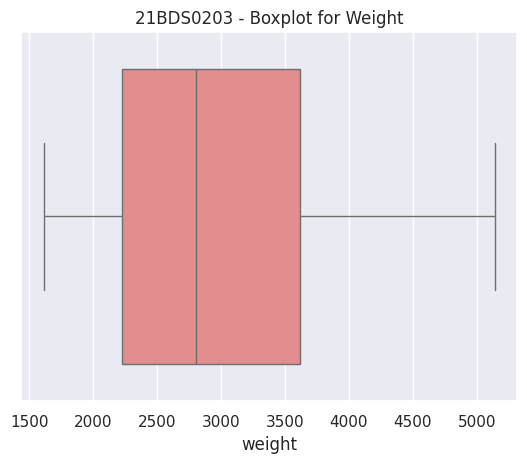

In [45]:
#Boxplot for weight
sns.boxplot(x=auto_df['weight'], color = 'lightcoral')
plt.title('21BDS0203 - Boxplot for Weight')
plt.show()

#### Bivariate Analysis

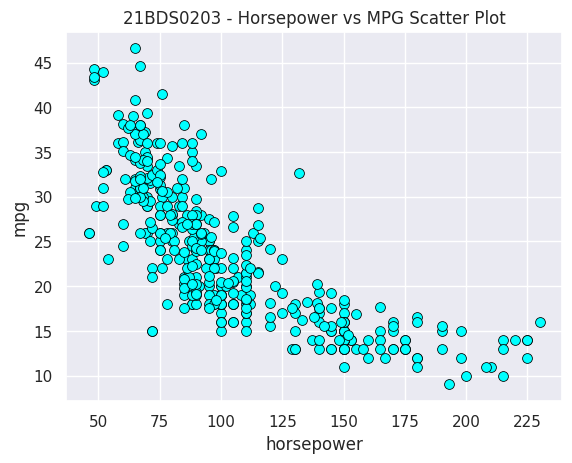

In [46]:
# Scatter plot between horsepower and mpg
sns.scatterplot(x='horsepower', y='mpg', data=auto_df, color='cyan', s=50, edgecolor='black')
plt.title('21BDS0203 - Horsepower vs MPG Scatter Plot')
plt.show()

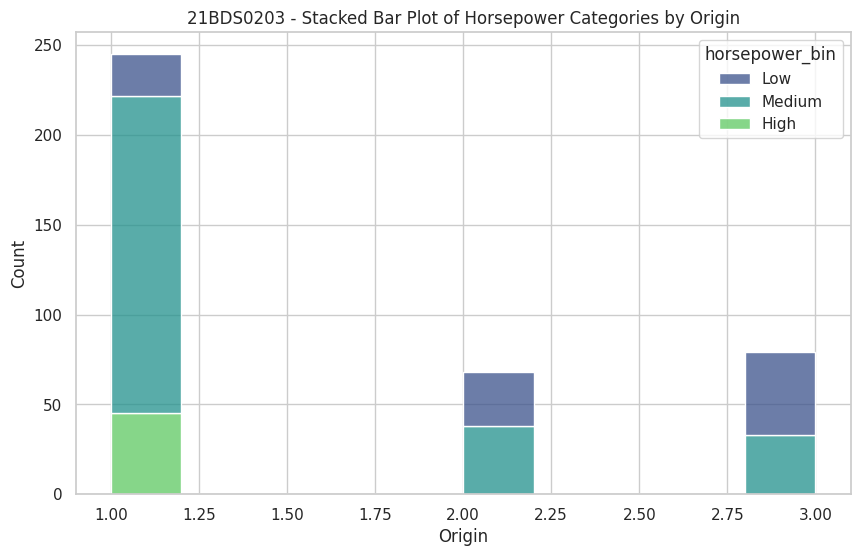

In [47]:
# Bin the horsepower values into categories (e.g., Low, Medium, High)
bins = [auto_df['horsepower'].min(), 75, 150, auto_df['horsepower'].max()]
labels = ['Low', 'Medium', 'High']
auto_df['horsepower_bin'] = pd.cut(auto_df['horsepower'], bins=bins, labels=labels, include_lowest=True)

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a countplot where bars are stacked by 'horsepower_bin'
sns.histplot(data=auto_df, x='origin', hue='horsepower_bin', multiple='stack', palette='viridis')
plt.title('21BDS0203 - Stacked Bar Plot of Horsepower Categories by Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()

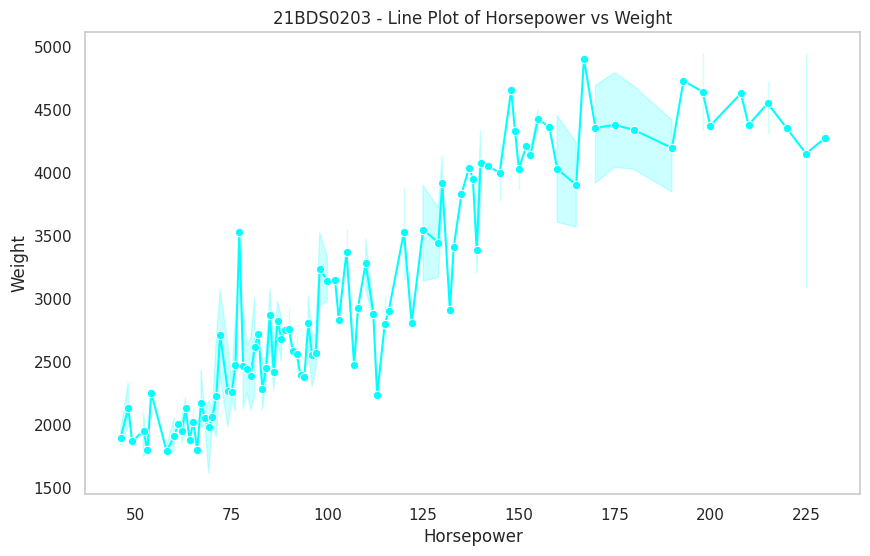

In [48]:
# Line plot between horsepower and weight
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.lineplot(x='horsepower', y='weight', data=auto_df, color='cyan', marker='o')
plt.title('21BDS0203 - Line Plot of Horsepower vs Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.grid(False)
plt.show()

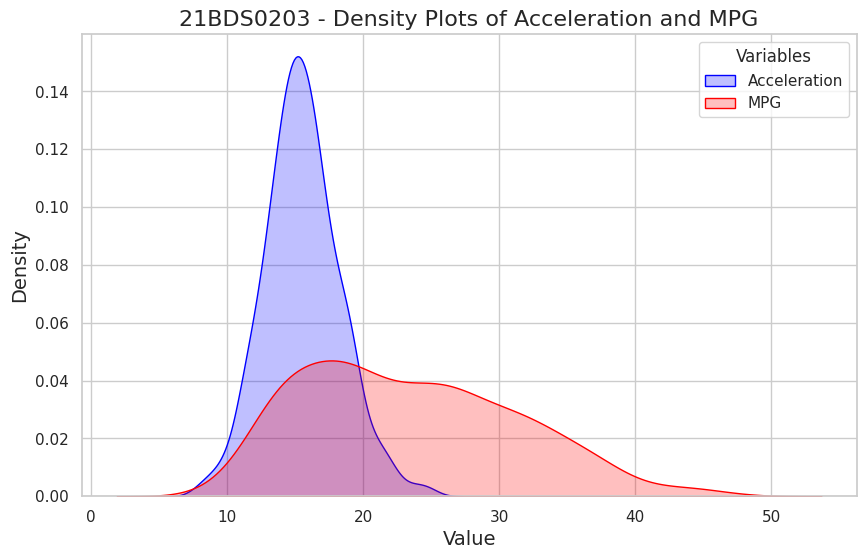

In [49]:
# Density plots for acceleration and mpg
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.kdeplot(auto_df['acceleration'], label='Acceleration', color='blue', shade=True)
sns.kdeplot(auto_df['mpg'], label='MPG', color='red', shade=True)
plt.title('21BDS0203 - Density Plots of Acceleration and MPG', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Variables')
plt.show()

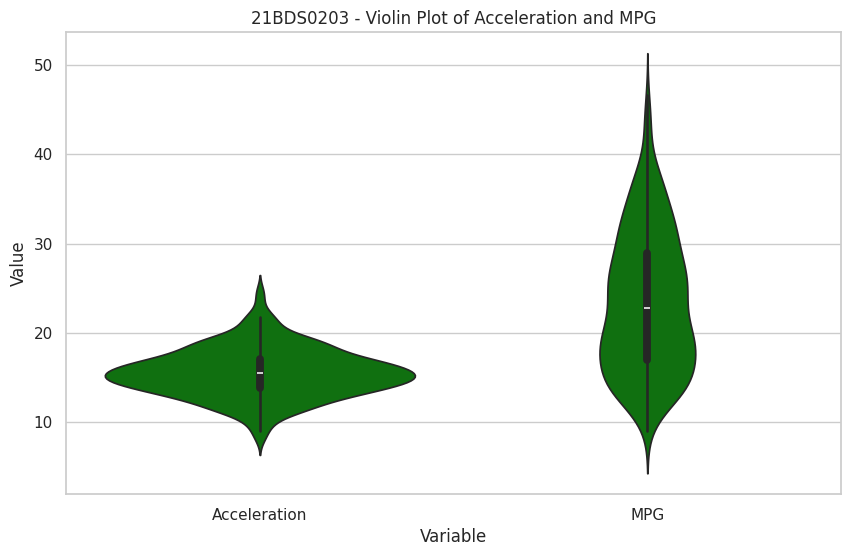

In [50]:
# Violin Plot between Acceleration and mpg
melted_df = auto_df[['acceleration', 'mpg']].melt(var_name='Variable', value_name='Value')
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.violinplot(x='Variable', y='Value', data=melted_df, color='green')
plt.title('21BDS0203 - Violin Plot of Acceleration and MPG')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(ticks=[0, 1], labels=['Acceleration', 'MPG'])
plt.show()

#### Multivariate Analysis

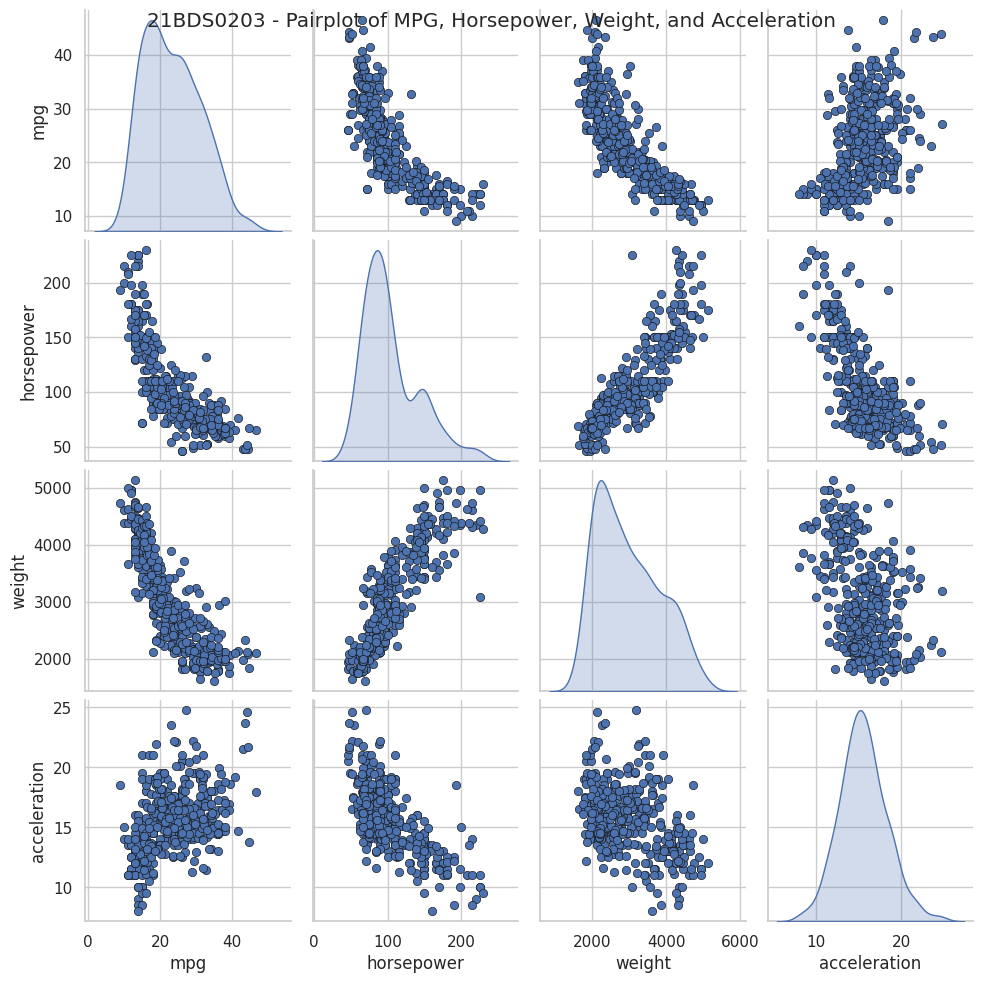

In [51]:
# Pairplot with custom color palette and size
sns.pairplot(auto_df[['mpg', 'horsepower', 'weight', 'acceleration']], diag_kind='kde', plot_kws={'edgecolor': 'k'}, palette='husl')
plt.suptitle('21BDS0203 - Pairplot of MPG, Horsepower, Weight, and Acceleration')
plt.show()

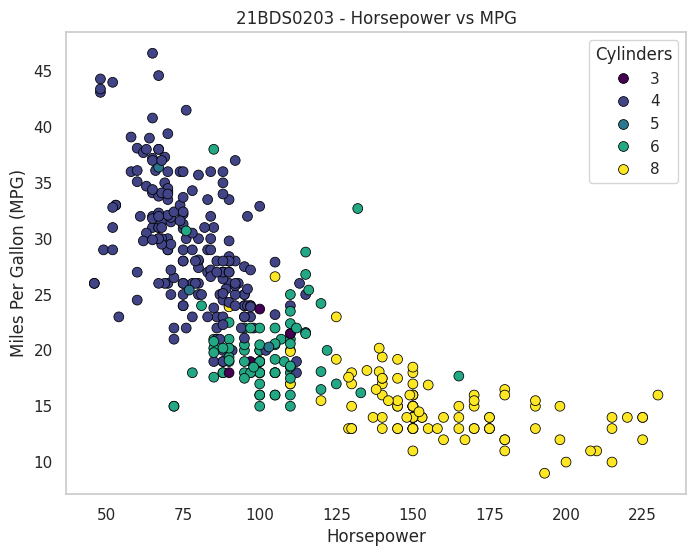

In [52]:
# Scatter plot between horsepower and mpg with custom colors through no.of cylinders
plt.figure(figsize=(8, 6))
sns.scatterplot(x='horsepower', y='mpg', data=auto_df, hue='cylinders', palette='viridis', s=50, edgecolor='black')
plt.title('21BDS0203 - Horsepower vs MPG')
plt.xlabel('Horsepower')
plt.ylabel('Miles Per Gallon (MPG)')
plt.legend(title='Cylinders')
plt.grid(False)
plt.show()

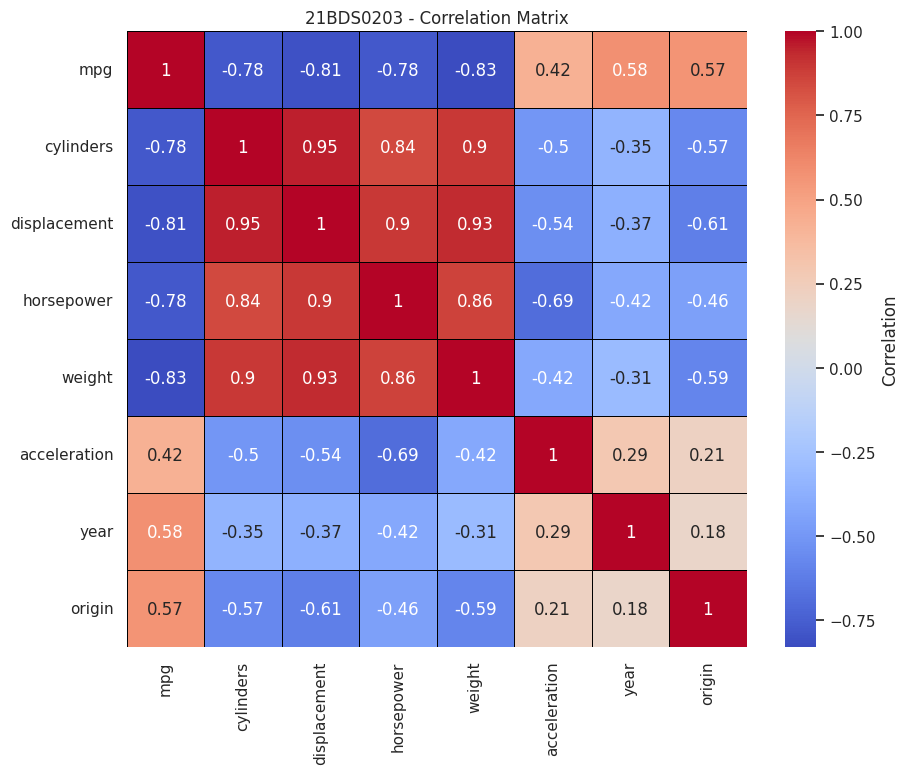

In [53]:
# Correlation heatmap with custom colors
plt.figure(figsize=(10, 8))
numerical_cols = [cname for cname in auto_df.columns if auto_df[cname].dtype in ['int64', 'float64']]
num_df = auto_df[numerical_cols]
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black', cbar_kws={'label': 'Correlation'})
plt.title('21BDS0203 - Correlation Matrix')
plt.show()

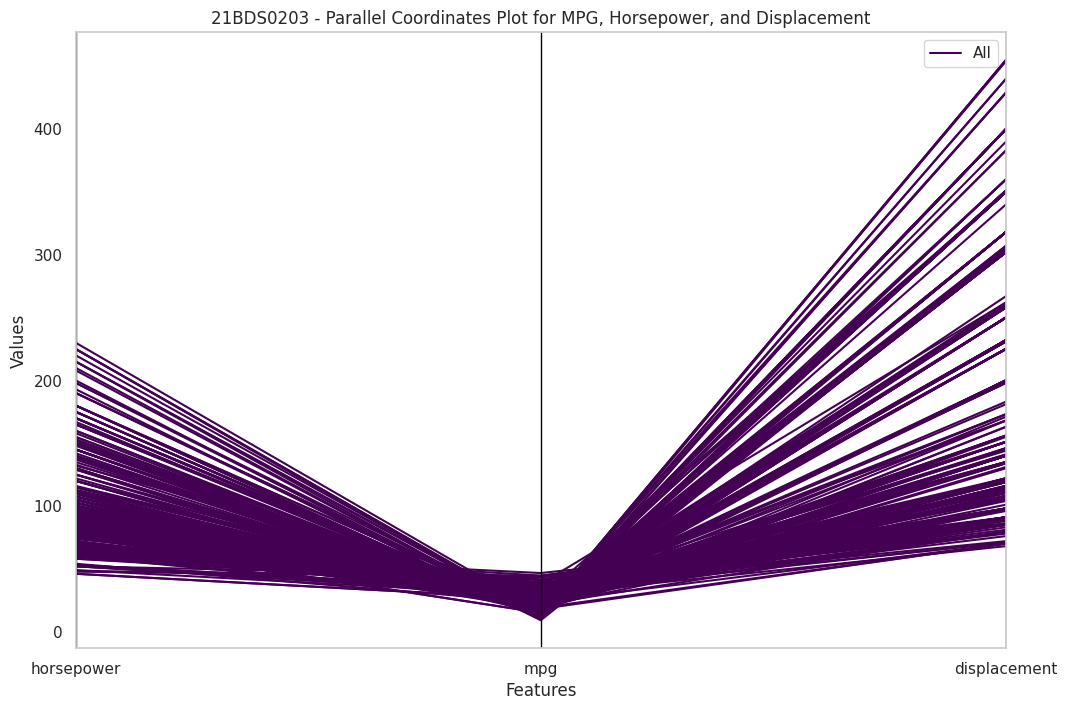

In [54]:
# Parallel Coordinate Plot
auto_df['Category'] = 'All'

plt.figure(figsize=(12, 8))
parallel_coordinates(auto_df[['horsepower', 'mpg', 'displacement', 'Category']], 'Category', colormap='viridis')
plt.title('21BDS0203 - Parallel Coordinates Plot for MPG, Horsepower, and Displacement')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

#### Elbow Method for Optimal Number of Clusters

In [55]:
# Select features for clustering
X = auto_df[['weight', 'horsepower', 'displacement']].values

In [56]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
# Elbow method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

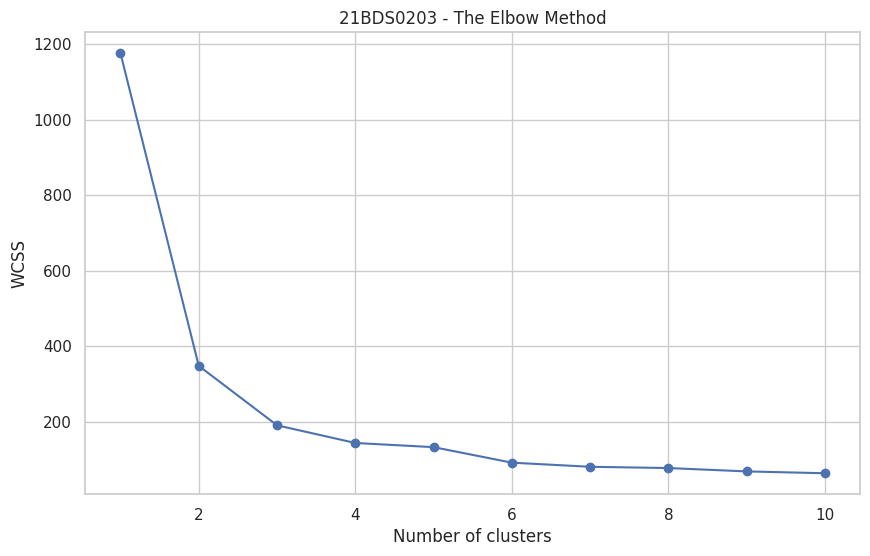

In [58]:
# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('21BDS0203 - The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### K Means Clustering

In [59]:
# Fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

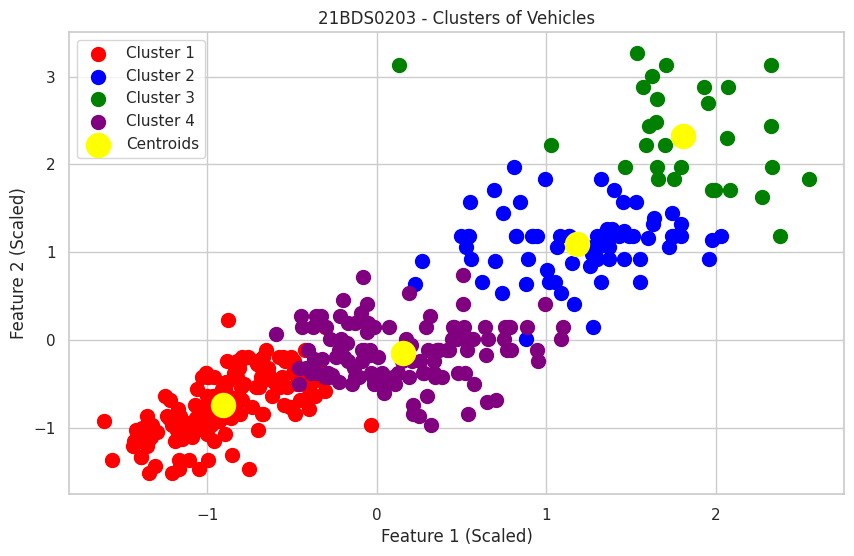

In [60]:
# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s=100, c='purple', label='Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('21BDS0203 - Clusters of Vehicles')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.show()

#### Hierarchical Clustering

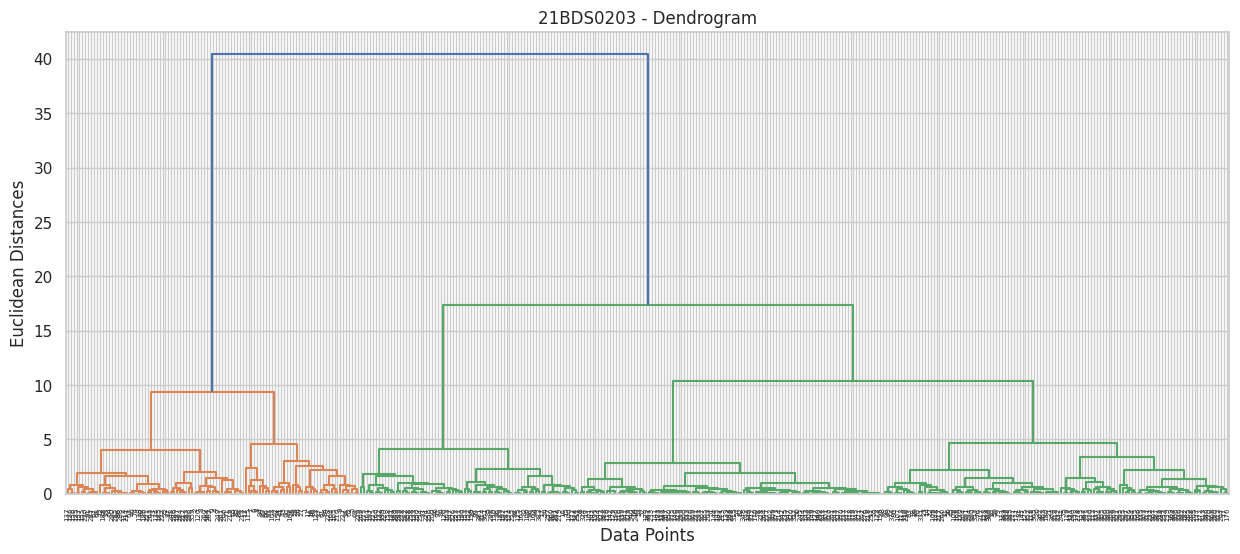

In [61]:
# Scaling data for hierarchical clustering
X_hierarchical = scaler.fit_transform(X)

# Dendrogram to find the optimal number of clusters
plt.figure(figsize=(15, 6))
plt.title('21BDS0203 - Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
dendrogram = sch.dendrogram(sch.linkage(X_hierarchical, method='ward'))
plt.show()

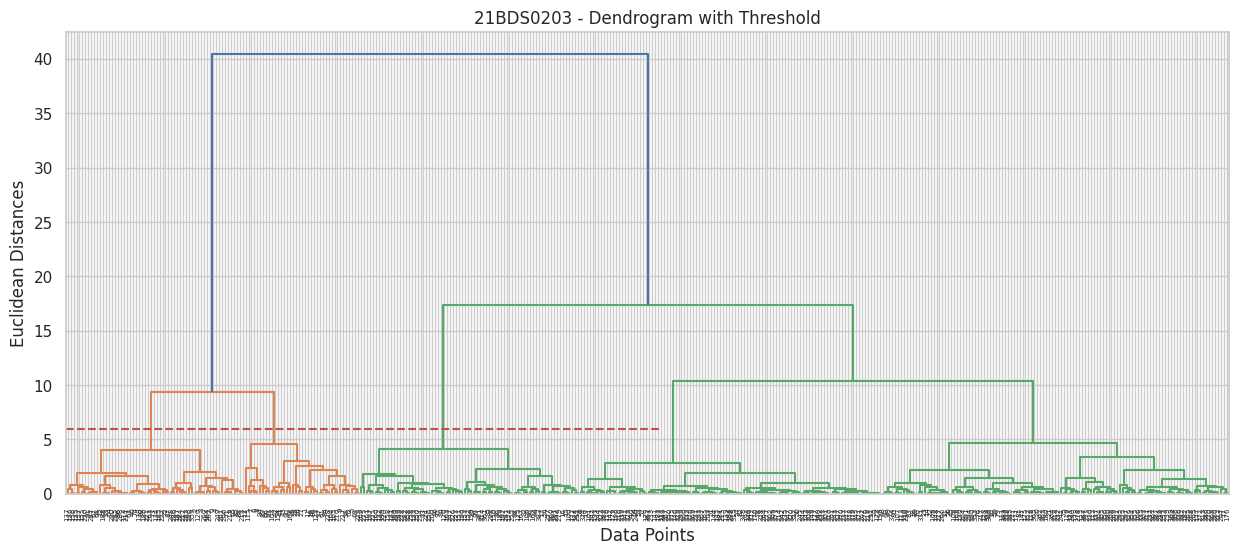

In [62]:
# Plot with suggested threshold line to indicate optimal clusters
plt.figure(figsize=(15, 6))
plt.title('21BDS0203 - Dendrogram with Threshold')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
dendrogram = sch.dendrogram(sch.linkage(X_hierarchical, method='ward'))
plt.hlines(y=6, xmin=0, xmax=2000, colors='r', linestyles='--')
plt.show()

#### Principle Component Analysis for Dimensionality Reduction

In [63]:
# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(auto_df.select_dtypes(include=['float64', 'int64']))

In [64]:
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

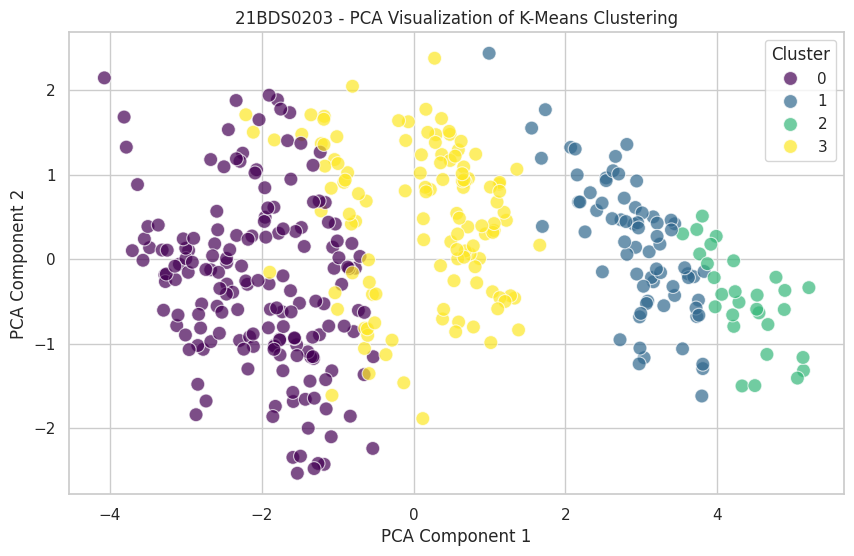

In [65]:
# Plot PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.7)
plt.title('21BDS0203 - PCA Visualization of K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

#### Multidimensional Scaling

In [66]:
# Apply MDS to reduce to 2 dimensions
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(X_scaled)  # Use your standardized data

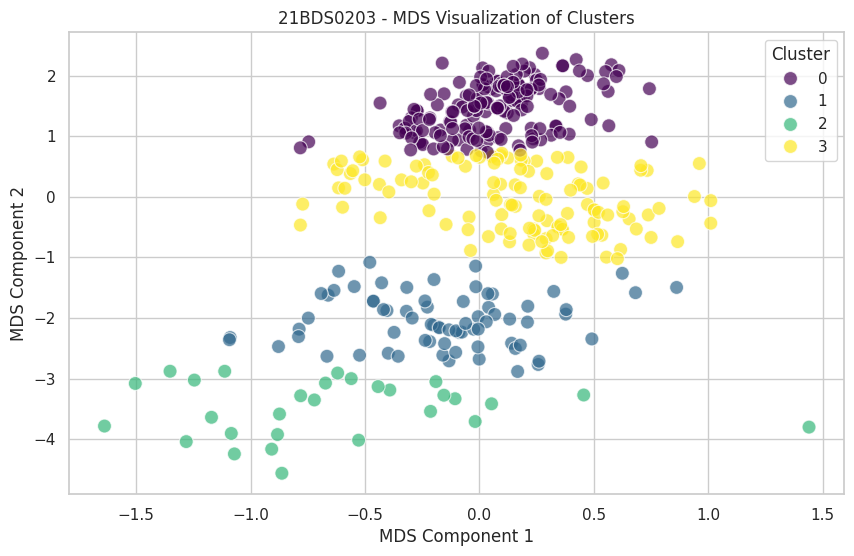

In [67]:
# Create a scatter plot of the MDS results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mds_result[:, 0], y=mds_result[:, 1], hue=y_kmeans, palette='viridis', s=100, alpha=0.7)
plt.title('21BDS0203 - MDS Visualization of Clusters')
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.legend(title='Cluster')
plt.show()

#### Model Training using Linear Regression and Evaluation

In [70]:
# Prepare data
X = auto_df[['weight', 'horsepower', 'displacement']]
y = auto_df['mpg']

In [73]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
# Linear Regression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [75]:
# Evaluation
y_pred = regressor.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 18.668908740663706
R2 Score: 0.6471227898347744
